In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
data_dir='leafvillage'

In [17]:
import pathlib

In [18]:
data_dir=pathlib.Path(data_dir)
data_dir


WindowsPath('leafvillage')

In [19]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [20]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(str(bacteria))
bacteria


[WindowsPath('leafvillage/Bacterial leaf blight/DSC_0365.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0366.jpg'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0367.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0370.jpg'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0372.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0373.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0374.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0375.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0376.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0377.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0378.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0379.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0380.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0381.JPG'),
 WindowsPath('leafvillage/Bacterial leaf blight/DSC_0382.JPG'),
 WindowsPath('leafvillage/Bacterial leaf

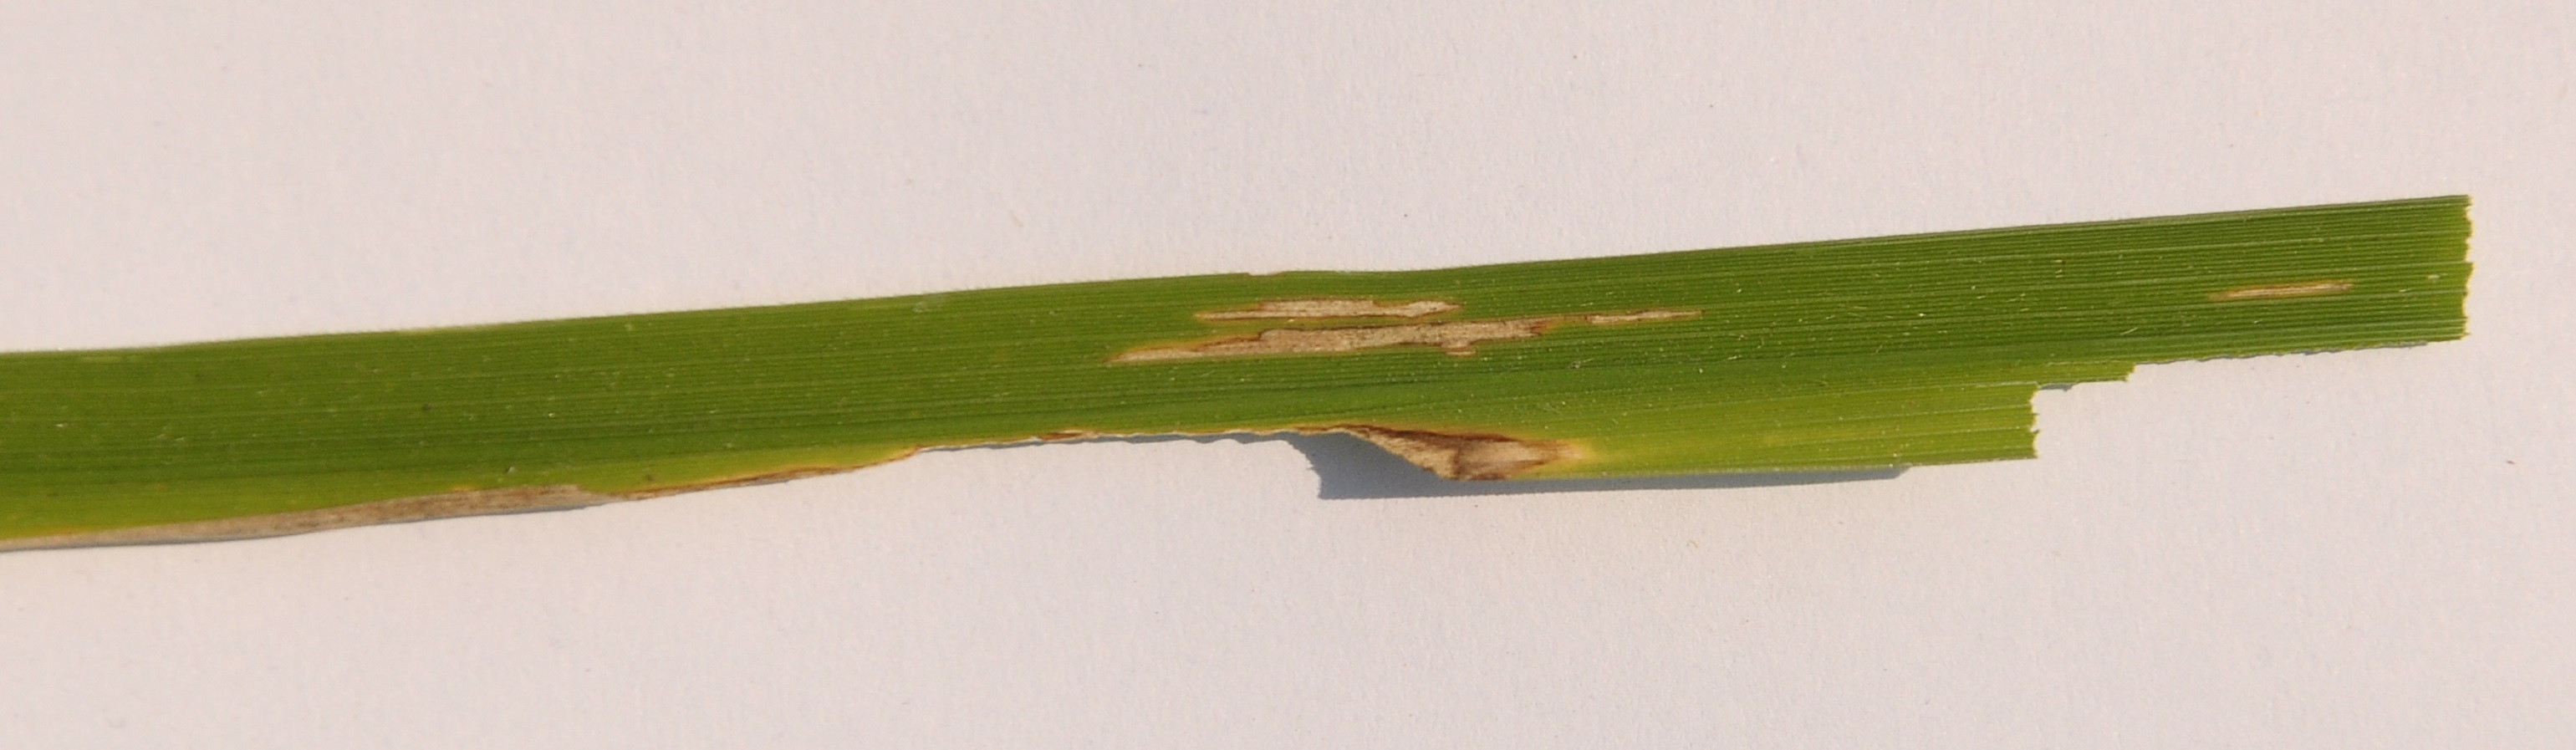

In [21]:
PIL.Image.open(str(bacteria[0]))

In [22]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [23]:
dict={
    "bacteria":list(data_dir.glob("Bacterial leaf blight/*")),
    "brown":list(data_dir.glob("Brown spot/*")),
    "smut":list(data_dir.glob("Leaf smut/*"))
}

In [24]:
labels_dict={
    'bacteria':0,
    'brown':1,
    'smut':2
}

In [25]:
img=cv2.imread(str((dict['smut'][0])))

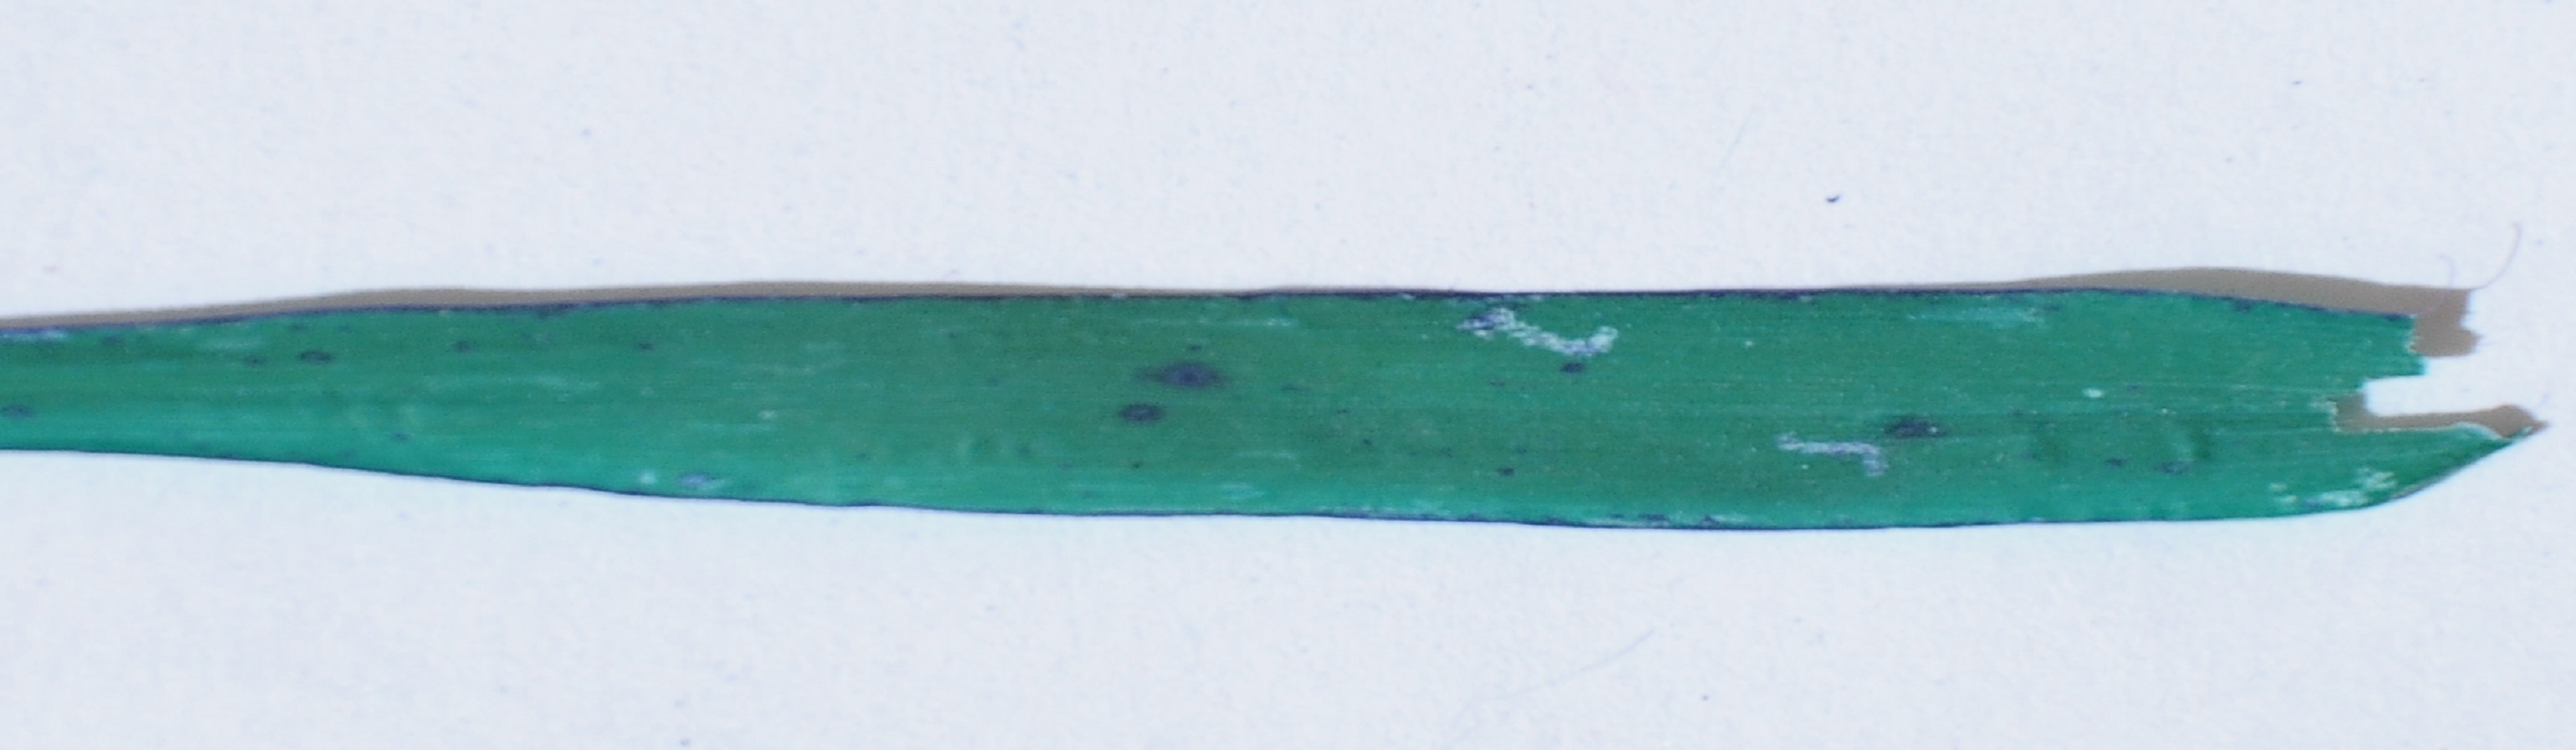

In [26]:
PIL.Image.fromarray(img)


In [27]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [28]:
x=[]
y=[]
for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(labels_dict[name])

In [29]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [30]:
x=np.array(x)
y=np.array(y)

In [31]:
x

array([[[[209, 215, 228],
         [208, 213, 228],
         [207, 214, 229],
         ...,
         [205, 211, 228],
         [209, 214, 229],
         [210, 216, 229]],

        [[209, 215, 226],
         [209, 214, 229],
         [209, 214, 229],
         ...,
         [210, 213, 228],
         [209, 216, 231],
         [210, 214, 232]],

        [[209, 214, 229],
         [209, 214, 229],
         [208, 214, 227],
         ...,
         [211, 211, 225],
         [209, 216, 232],
         [209, 213, 231]],

        ...,

        [[211, 217, 228],
         [207, 215, 228],
         [209, 215, 228],
         ...,
         [212, 217, 232],
         [209, 215, 226],
         [210, 216, 229]],

        [[210, 216, 229],
         [208, 214, 227],
         [210, 216, 231],
         ...,
         [210, 214, 231],
         [210, 216, 227],
         [209, 215, 228]],

        [[209, 214, 229],
         [209, 213, 227],
         [208, 215, 230],
         ...,
         [209, 214, 229],
        

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [33]:
len(x_train)

90

In [34]:
x_scale=x_train/255
x_tscale=x_test/255


In [35]:
num_classes=3

In [36]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

(0.0, 1.0, 0.0, 1.0)

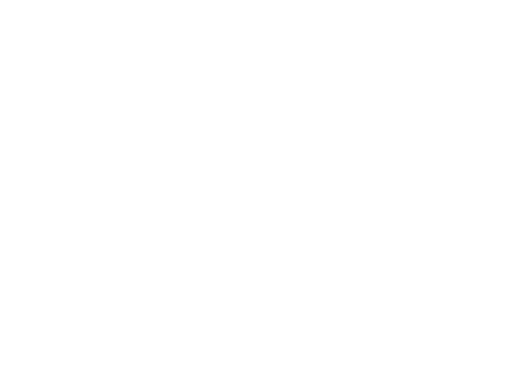

In [37]:
plt.axis('off')

(-0.5, 179.5, 179.5, -0.5)

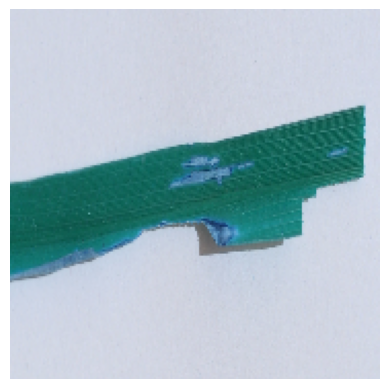

In [38]:
plt.imshow(x[0])
plt.axis('off')

In [39]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_scale,y_train,epochs=50)

Epoch 1/50
3/3 [==============================] - 4s 572ms/step - loss: 2.1027 - accuracy: 0.3111
Epoch 2/50
3/3 [==============================] - 2s 509ms/step - loss: 1.2541 - accuracy: 0.3444
Epoch 3/50
3/3 [==============================] - 2s 487ms/step - loss: 1.1287 - accuracy: 0.3222
Epoch 4/50
3/3 [==============================] - 2s 492ms/step - loss: 1.0929 - accuracy: 0.4111
Epoch 5/50
3/3 [==============================] - 2s 485ms/step - loss: 1.0938 - accuracy: 0.3556
Epoch 6/50
3/3 [==============================] - 1s 451ms/step - loss: 1.0679 - accuracy: 0.4778
Epoch 7/50
3/3 [==============================] - 1s 471ms/step - loss: 1.0571 - accuracy: 0.4111
Epoch 8/50
3/3 [==============================] - 1s 478ms/step - loss: 1.0294 - accuracy: 0.4111
Epoch 9/50
3/3 [==============================] - 2s 497ms/step - loss: 1.0137 - accuracy: 0.5222
Epoch 10/50
3/3 [==============================] - 1s 452ms/step - loss: 0.9991 - accuracy: 0.4333
Epoch 11/50
3/3 [==

In [41]:
model.evaluate(x_tscale,y_test)

1/1 [==============================] - 0s 389ms/step - loss: 0.3690 - accuracy: 0.7667


[0.3689878582954407, 0.7666666507720947]

In [42]:
imgt="images.jpg"
test=PIL.Image.open(imgt)
t=cv2.imread(imgt)
test=cv2.resize(t,(180,180))
test.shape
test=np.expand_dims(test, axis=0)

In [43]:
test=test/255.0

In [44]:
model.predict(test)

1/1 [==============================] - 0s 164ms/step


array([[-1.6616663,  3.4764588,  4.572398 ]], dtype=float32)

In [45]:
import pickle

In [46]:
pickle.dump(model,open('rice.pkl','wb'))
hello=pickle.load(open('rice.pkl','rb'))
k=hello.predict(test)
k.argmax()

1/1 [==============================] - 0s 85ms/step


2